In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pdpipe as pdp
import geopandas as gpd
import descartes

from shapely.geometry import Point, Polygon, MultiPolygon

In [35]:
name_main = "Data/demographics"

original_nta = pd.read_csv(name_main+".csv")
nta = original_nta
nta.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Bath Beach,Brooklyn,BK27,33163,2210,1826,1922,1657,1726,2850,...,1223,927,1290,2074,1352,1758,706,585,58243.0,75950.0
1,Bay Ridge,Brooklyn,BK31,79134,5166,4513,3379,3551,4347,6827,...,3235,3047,3542,5570,4108,4827,2497,2775,63539.0,86319.0
2,Bedford,Brooklyn,BK75,75318,7480,6580,5378,4635,6479,8683,...,3385,2509,3124,3706,2269,2847,1195,1034,39970.0,62616.0
3,Bensonhurst East,Brooklyn,BK29,64267,4151,3563,2891,3470,4182,4939,...,2718,2185,2655,3898,2558,2416,1144,844,48097.0,65715.0
4,Bensonhurst West,Brooklyn,BK28,91646,6498,5162,4529,4648,5793,8036,...,3383,3246,4036,5117,3428,3743,1649,1231,51035.0,70198.0


In [36]:
nta.set_index("nta_code", inplace=True)

pipe = pdp.ColDrop("nta_name")

'''
all nta boroughs (guess): ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island']
'''
nta = pipe(nta)
nta

,borough,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
nta_code,,,,,,,,,,,,,,,,,,,,,
BK27,Brooklyn,33163,2210,1826,1922,1657,1726,2850,2771,2442,...,1223,927,1290,2074,1352,1758,706,585,58243.0,75950.0
BK31,Brooklyn,79134,5166,4513,3379,3551,4347,6827,6876,5459,...,3235,3047,3542,5570,4108,4827,2497,2775,63539.0,86319.0
BK75,Brooklyn,75318,7480,6580,5378,4635,6479,8683,6984,5586,...,3385,2509,3124,3706,2269,2847,1195,1034,39970.0,62616.0
BK29,Brooklyn,64267,4151,3563,2891,3470,4182,4939,4634,4677,...,2718,2185,2655,3898,2558,2416,1144,844,48097.0,65715.0
BK28,Brooklyn,91646,6498,5162,4529,4648,5793,8036,7766,5917,...,3383,3246,4036,5117,3428,3743,1649,1231,51035.0,70198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BX63,The Bronx,37395,2751,3214,2731,2623,3367,3216,2866,2207,...,2170,1714,1713,1872,849,525,70,100,26520.0,37550.0
BX08,The Bronx,35752,2740,2706,2625,2266,2954,2996,2592,2682,...,1856,1570,1587,1698,932,660,182,35,29306.0,39917.0
BX59,The Bronx,28437,2281,1640,1644,1942,2668,2526,1908,1867,...,1064,994,986,1628,1172,885,217,289,43412.0,57590.0


In [37]:
nta.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'The Bronx'],
      dtype=object)

In [38]:
name_map = "Data/legend/geographic"

original_nta_map = pd.read_csv(name_map+".csv")
nta_map = original_nta_map
nta_map.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [39]:
outside_codes = set(nta_map.columns).difference(set(nta.index))

pipe_map = pdp.ColDrop(columns=outside_codes)

nta_map = pipe_map(nta_map)
nta_map.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [55]:
boroughs = {}
nta["geometry"] = Polygon([])
for code in list(nta_map.columns):
    lats = list(nta_map[code])[::2]
    longs = list(nta_map[code])[1::2]
    assert len(lats)==len(longs), str(code)+" doesn't have same no. of lats & longs..."
    nta.geometry[code] = Polygon([[lats[i],longs[i]] for i in range(len(lats))])
nta.geometry.head()

nta_code
BK27    POLYGON ((-74.0020053868385 40.5941406050305, ...
BK31    POLYGON ((-74.0326670428432 40.64372858720071,...
BK75    POLYGON ((-73.9419322154253 40.7007334909745, ...
BK29    POLYGON ((-73.9747780122118 40.6126467127678, ...
BK28    POLYGON ((-73.97963965192659 40.6155727854739,...
Name: geometry, dtype: object

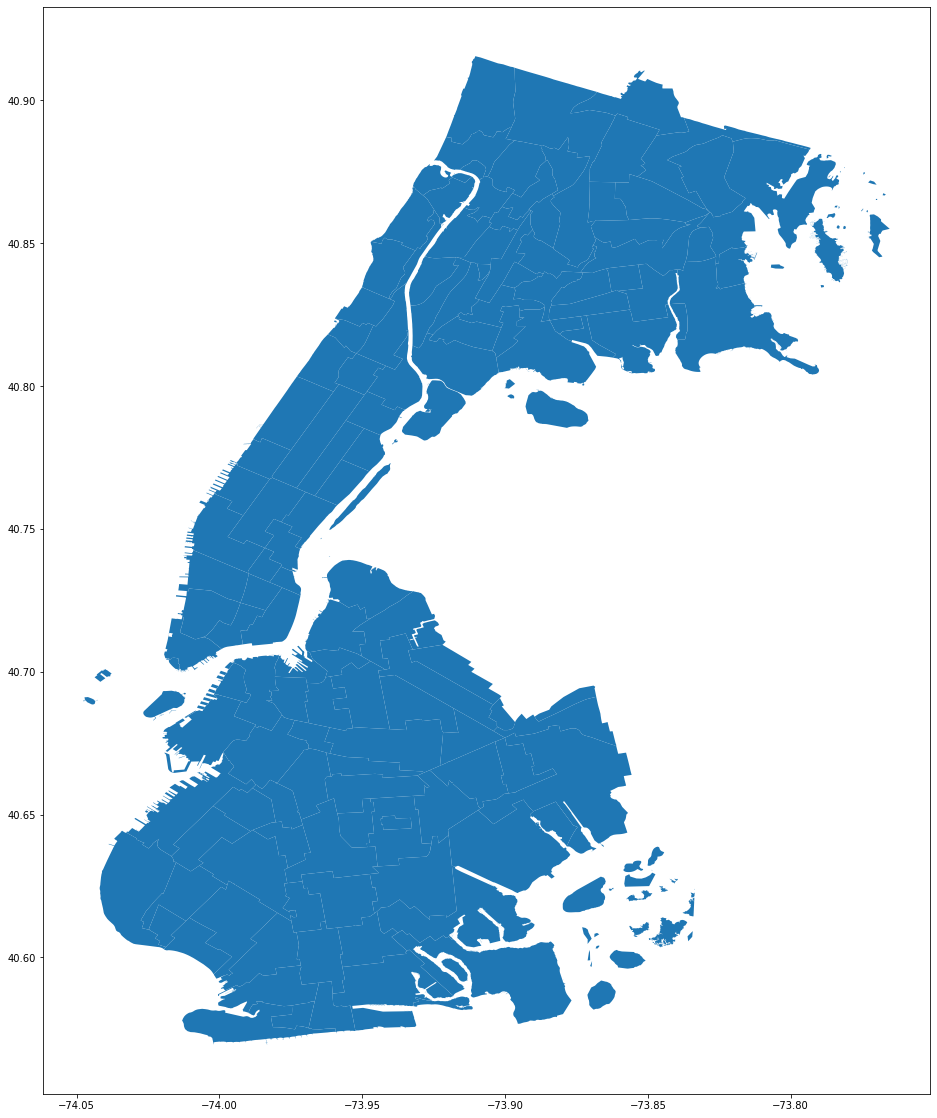

In [57]:
#expected result

out_nta = gpd.read_file("NTA map/geo_export_20a5e299-1421-4147-af3b-c2568e9598ad.shp")

out_nta.head()

out_nta.set_index("ntacode")
pipe = pdp.ColDrop("ntaname")
pipe += pdp.RowDrop({"boroname": lambda b : b in ["Staten Island","Queens"]})

out_nta = pipe(out_nta)
fig,ax = plt.subplots(figsize = (20,20))
out_nta.plot(ax=ax)
